In [1]:
import pandas as pd
import os

### G1 Info

In [2]:
files = os.listdir('groupsize')

In [3]:
files

['author_28000_29011.csv',
 'author_10000_12000.csv',
 'author_6000_8000.csv',
 'author_26000_28000.csv',
 'author_8000_10000.csv',
 '.DS_Store',
 'author_20000_22000.csv',
 'author_16000_18000.csv',
 'author_2000_4000.csv',
 'author_14000_16000.csv',
 'author_12000_14000.csv',
 'author_24000_26000.csv',
 'author_22000_24000.csv',
 'author_0_2000.csv',
 'author_4000_6000.csv',
 'author_18000_20000.csv']

In [4]:
Data = pd.DataFrame([])
for file in files:
    if file.endswith('csv'):
        data = pd.read_csv(f'groupsize/{file}')
        print(data.shape)
        Data = pd.concat((Data,data))

(171309, 14)
(359438, 14)
(514325, 14)
(548761, 14)
(473662, 14)
(391396, 14)
(224453, 14)
(552585, 14)
(268682, 14)
(404899, 14)
(361379, 14)
(448591, 14)
(558010, 14)
(445556, 14)
(179733, 14)


In [5]:
Data.head(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age,last_pub_year,career_len
0,W1982782877,first,A1135552249,I201448701,2006,2005,1,1,A2210051518,2006,1.0,1,2009.0,4.0
1,W1982782877,first,A1135552249,I201448701,2006,2005,1,2,A2210051518,2007,1.0,2,2009.0,4.0
2,W1737143051,first,A1975593598,I201448701,2007,1998,9,2,A2210051518,2007,1.0,9,2014.0,16.0
3,W1982782877,first,A1135552249,I201448701,2006,2005,1,12,A2210051518,2008,1.0,3,2009.0,4.0
4,W1737143051,first,A1975593598,I201448701,2007,1998,9,12,A2210051518,2008,1.0,10,2014.0,16.0


In [6]:
Data.to_csv('group_info_OnlyLastAuthorPaper(3_years_window).csv',index=0)

### G2 Info

In [2]:
files = os.listdir('groupsize_G2')

In [3]:
files

['author_90000_100000.csv',
 'author_40000_50000.csv',
 'author_0_10000.csv',
 'author_30000_40000.csv',
 'author_80000_90000.csv',
 'author_10000_20000.csv',
 'author_20000_30000.csv',
 'author_100000_110000.csv',
 'author_110000_121578.csv',
 'author_50000_60000.csv',
 'author_60000_70000.csv',
 '.ipynb_checkpoints',
 'author_70000_80000.csv']

In [4]:
Data = pd.DataFrame([])
for file in files:
    if file.endswith('csv'):
        data = pd.read_csv(f'groupsize_G2/{file}')
        print(data.shape)
        Data = pd.concat((Data,data))

(69408, 12)
(65971, 12)
(73503, 12)
(62782, 12)
(58140, 12)
(72538, 12)
(74726, 12)
(56900, 12)
(67728, 12)
(67180, 12)
(66879, 12)
(59184, 12)


In [5]:
Data.shape

(794939, 12)

In [8]:
Data.sample(5)

,work_id,author_position,author_id,institution_id,publication_year,first_pub_year,scientific_age,group_size,mentor_id,current_year,ratio_institution,current_scientific_age
44131,W2765904352,middle,A2690978501,I219193219,2017,2017,0,7,A2095760383,2017,0.388235,0
53772,W2604632116,middle,A2090502705,I130769515,2008,2007,1,15,A2468596650,2013,0.379464,6
53817,W2134345633,first,A202266911,I1282927834,2013,2012,1,7,A2715796631,2015,0.346457,3
26695,W2518696908,middle,A2951944522,I180585399,2004,1999,5,4,A2309164315,2006,0.100977,7
45484,W1974055183,middle,A2140340231,I1288214837,2010,2005,5,11,A2107228777,2014,0.522449,9


In [7]:
Data.to_csv('G2_group_info_OnlyLastAuthorPaper(current_scientific_age).csv',index=0)

In [9]:
target_author = list(Data.mentor_id.drop_duplicates())
len(target_author)

19334

In [10]:
G1_mentee_work_career = pd.read_csv('G1_mentee_work_career.csv')

In [11]:
G1_mentee_work_career.head(5)

,work_id,author_id,publication_year,first_pub_year,last_pub_year,career_len
0,W2183897491,A100345908,2014,2007,2021,14
1,W2081058593,A100345908,2007,2007,2021,14
2,W2025851120,A100345908,2014,2007,2021,14
3,W1983338691,A100345908,2010,2007,2021,14
4,W2107552544,A100345908,2014,2007,2021,14


In [63]:
tp0 = G1_mentee_work_career[['author_id','career_len']][G1_mentee_work_career.career_len>5].drop_duplicates()

<Axes: xlabel='career_len', ylabel='Probability'>

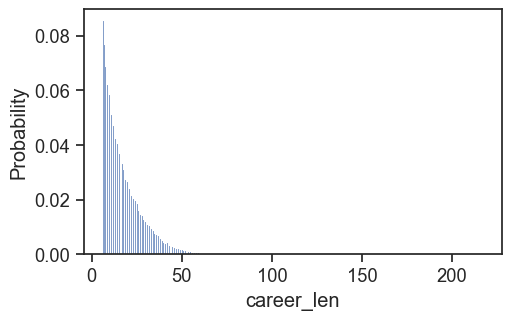

In [64]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=tp0, x="career_len",stat='probability',
             ax=ax)

In [47]:
tp = G1_mentee_work_career[['author_id','career_len']][G1_mentee_work_career.author_id.isin(target_author)].drop_duplicates()

In [56]:
tp.sample(5)

,author_id,career_len
2984418,A2147823814,30
4002519,A2406228557,20
8310190,A2130723381,28
1934056,A2089853345,21
2186516,A2135332559,34


In [43]:
tp

6

In [57]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  #画密度图
from matplotlib.dates import DateFormatter, ConciseDateFormatter
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable #python颜色库

<Axes: xlabel='career_len', ylabel='Probability'>

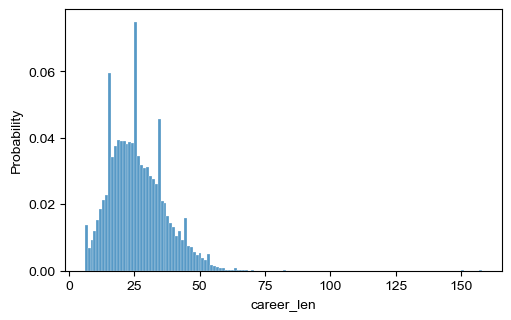

In [58]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=tp, x="career_len",stat='probability',
             ax=ax)